In [20]:
import pandas as pd
import glob

# 获取所有CSV文件的路径
csv_files = glob.glob("D:\python\smoke_week_1.0_xgb\data/*.csv")  # 修改为你的文件存放路径D:\python\smoke_week_1.0_xgb\data

# 合并所有CSV文件
data_list = []
for file in csv_files:
    df = pd.read_csv(file)
    data_list.append(df)

# 将所有数据合并成一个DataFrame
data = pd.concat(data_list, ignore_index=True)

# 将日期列转换为日期时间格式
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 按日期排序
data.sort_values('timestamp', inplace=True)

# 重置索引
data.reset_index(drop=True, inplace=True)

# 保存合并后的数据
data.to_csv('merged_data.csv', index=False)
print("Data merged and saved to merged_data.csv")
print(data.head())

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\935457741.py:5: SyntaxWarning: invalid escape sequence '\p'
  csv_files = glob.glob("D:\python\smoke_week_1.0_xgb\data/*.csv")  # 修改为你的文件存放路径D:\python\smoke_week_1.0_xgb\data


Data merged and saved to merged_data.csv
            timestamp     open     high      low    close  volume
0 2019-01-02 04:00:00  145.156  145.208  144.945  144.999   10183
1 2019-01-02 04:01:00  145.060  145.111  144.888  145.086    4827
2 2019-01-02 04:02:00  145.060  145.150  144.984  145.125    4655
3 2019-01-02 04:03:00  145.156  145.227  145.013  145.202    7990
4 2019-01-02 04:04:00  145.166  145.285  145.100  145.260    3100


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('D:\python\smoke_week_1.0_xgb\data\intraday_1min_QQQ_merged_data_2019_01_TO_2024_07.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\477658290.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('D:\python\smoke_week_1.0_xgb\data\intraday_1min_QQQ_merged_data_2019_01_TO_2024_07.csv')


In [22]:
df

,timestamp,open,high,low,close,volume
0,2019-01-02 04:00:00,145.156,145.208,144.945,144.999,10183
1,2019-01-02 04:01:00,145.060,145.111,144.888,145.086,4827
2,2019-01-02 04:02:00,145.060,145.150,144.984,145.125,4655
3,2019-01-02 04:03:00,145.156,145.227,145.013,145.202,7990
4,2019-01-02 04:04:00,145.166,145.285,145.100,145.260,3100
...,...,...,...,...,...,...
1172459,2024-07-16 19:55:00,495.640,495.640,495.625,495.640,121
1172460,2024-07-16 19:56:00,495.610,495.640,495.600,495.630,3777
1172461,2024-07-16 19:57:00,495.630,495.630,495.590,495.600,69
1172462,2024-07-16 19:58:00,495.600,495.600,495.490,495.500,11351


In [23]:
# 假设日期列名为'timestamp'，将其转换为日期时间格式
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [ ]:
# 绘制时间序列图
plt.figure(figsize=(15, 10))
sns.lineplot(x='timestamp', y='close', data=data)
plt.title('Timestamp vs Close Price')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
import ta

In [28]:
 #设置时间戳为索引
data.set_index('timestamp', inplace=True)

# 计算1分钟RSI
data['rsi_1min'] = ta.momentum.RSIIndicator(data['close'], window=14).rsi()

# 计算5分钟RSI
data_5min = data['close'].resample('5T').last().ffill()
data['rsi_5min'] = ta.momentum.RSIIndicator(data_5min, window=14).rsi()
data['rsi_5min'] = data['rsi_5min'].reindex(data.index, method='ffill')  # 前向填充NaN值

# 计算30分钟RSI
data_30min = data['close'].resample('30T').last().ffill()
data['rsi_30min'] = ta.momentum.RSIIndicator(data_30min, window=14).rsi()
data['rsi_30min'] = data['rsi_30min'].reindex(data.index, method='ffill')  # 前向填充NaN值

# 计算60分钟RSI
data_60min = data['close'].resample('60T').last().ffill()
data['rsi_60min'] = ta.momentum.RSIIndicator(data_60min, window=14).rsi()
data['rsi_60min'] = data['rsi_60min'].reindex(data.index, method='ffill')  # 前向填充NaN值

# 计算4小时RSI
data_4h = data['close'].resample('4H').last().ffill()
data['rsi_4h'] = ta.momentum.RSIIndicator(data_4h, window=14).rsi()
data['rsi_4h'] = data['rsi_4h'].reindex(data.index, method='ffill')

# 计算每日RSI
data_daily = data['close'].resample('D').last().ffill()
data['rsi_daily'] = ta.momentum.RSIIndicator(data_daily, window=14).rsi()
data['rsi_daily'] = data['rsi_daily'].reindex(data.index, method='ffill')

# 计算每周RSI
data_weekly = data['close'].resample('W').last().ffill()
data['rsi_weekly'] = ta.momentum.RSIIndicator(data_weekly, window=14).rsi()
data['rsi_weekly'] = data['rsi_weekly'].reindex(data.index, method='ffill')

# 保存包含RSI的数据
data.to_csv('data_with_rsi.csv', index=True)
print("Data with RSI saved to data_with_rsi.csv")
print(data.head())

C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\532200736.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_5min = data['close'].resample('5T').last().ffill()
C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\532200736.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_30min = data['close'].resample('30T').last().ffill()
C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\532200736.py:18: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_60min = data['close'].resample('60T').last().ffill()
C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\532200736.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_4h = data['close'].resample('4H').last().ffill()


Data with RSI saved to data_with_rsi.csv
                        open     high      low    close  volume  rsi_1min  \
timestamp                                                                   
2019-01-02 04:00:00  145.156  145.208  144.945  144.999   10183       NaN   
2019-01-02 04:01:00  145.060  145.111  144.888  145.086    4827       NaN   
2019-01-02 04:02:00  145.060  145.150  144.984  145.125    4655       NaN   
2019-01-02 04:03:00  145.156  145.227  145.013  145.202    7990       NaN   
2019-01-02 04:04:00  145.166  145.285  145.100  145.260    3100       NaN   

                     rsi_5min  rsi_30min  rsi_60min  rsi_4h  rsi_daily  \
timestamp                                                                
2019-01-02 04:00:00       NaN        NaN        NaN     NaN        NaN   
2019-01-02 04:01:00       NaN        NaN        NaN     NaN        NaN   
2019-01-02 04:02:00       NaN        NaN        NaN     NaN        NaN   
2019-01-02 04:03:00       NaN        NaN        N

In [30]:


# 计算1分钟RSI
data['rsi_1min'] = ta.momentum.RSIIndicator(data['close'], window=14).rsi()

# 计算5分钟RSI
data_5min = data['close'].resample('5T').last().ffill()
rsi_5min = ta.momentum.RSIIndicator(data_5min, window=14).rsi()
data['rsi_5min'] = rsi_5min.reindex(data.index, method='ffill').ffill()

# 计算30分钟RSI
data_30min = data['close'].resample('30T').last().ffill()
rsi_30min = ta.momentum.RSIIndicator(data_30min, window=14).rsi()
data['rsi_30min'] = rsi_30min.reindex(data.index, method='ffill').ffill()

# 计算60分钟RSI
data_60min = data['close'].resample('60T').last().ffill()
rsi_60min = ta.momentum.RSIIndicator(data_60min, window=14).rsi()
data['rsi_60min'] = rsi_60min.reindex(data.index, method='ffill').ffill()

# 计算4小时RSI
data_4h = data['close'].resample('4H').last().ffill()
rsi_4h = ta.momentum.RSIIndicator(data_4h, window=14).rsi()
data['rsi_4h'] = rsi_4h.reindex(data.index, method='ffill').ffill()

# 计算每日RSI
data_daily = data['close'].resample('D').last().ffill()
rsi_daily = ta.momentum.RSIIndicator(data_daily, window=14).rsi()
data['rsi_daily'] = rsi_daily.reindex(data.index, method='ffill').ffill()

# 计算每周RSI
data_weekly = data['close'].resample('W').last().ffill()
rsi_weekly = ta.momentum.RSIIndicator(data_weekly, window=14).rsi()
data['rsi_weekly'] = rsi_weekly.reindex(data.index, method='ffill').ffill()
# 保存包含RSI的数据
data.to_csv('data_with_rsi_comparison.csv', index=True)
print("Data with RSI comparison saved to data_with_rsi_comparison.csv")
print(data.head())

C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\534807958.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_5min = data['close'].resample('5T').last().ffill()
C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\534807958.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_30min = data['close'].resample('30T').last().ffill()
C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\534807958.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_60min = data['close'].resample('60T').last().ffill()
C:\Users\zhaoz\AppData\Local\Temp\ipykernel_32896\534807958.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_4h = data['close'].resample('4H').last().ffill()


Data with RSI comparison saved to data_with_rsi_comparison.csv
                        open     high      low    close  volume  rsi_1min  \
timestamp                                                                   
2019-01-02 04:00:00  145.156  145.208  144.945  144.999   10183       NaN   
2019-01-02 04:01:00  145.060  145.111  144.888  145.086    4827       NaN   
2019-01-02 04:02:00  145.060  145.150  144.984  145.125    4655       NaN   
2019-01-02 04:03:00  145.156  145.227  145.013  145.202    7990       NaN   
2019-01-02 04:04:00  145.166  145.285  145.100  145.260    3100       NaN   

                     rsi_5min  rsi_30min  rsi_60min  rsi_4h  rsi_daily  \
timestamp                                                                
2019-01-02 04:00:00       NaN        NaN        NaN     NaN        NaN   
2019-01-02 04:01:00       NaN        NaN        NaN     NaN        NaN   
2019-01-02 04:02:00       NaN        NaN        NaN     NaN        NaN   
2019-01-02 04:03:00       N

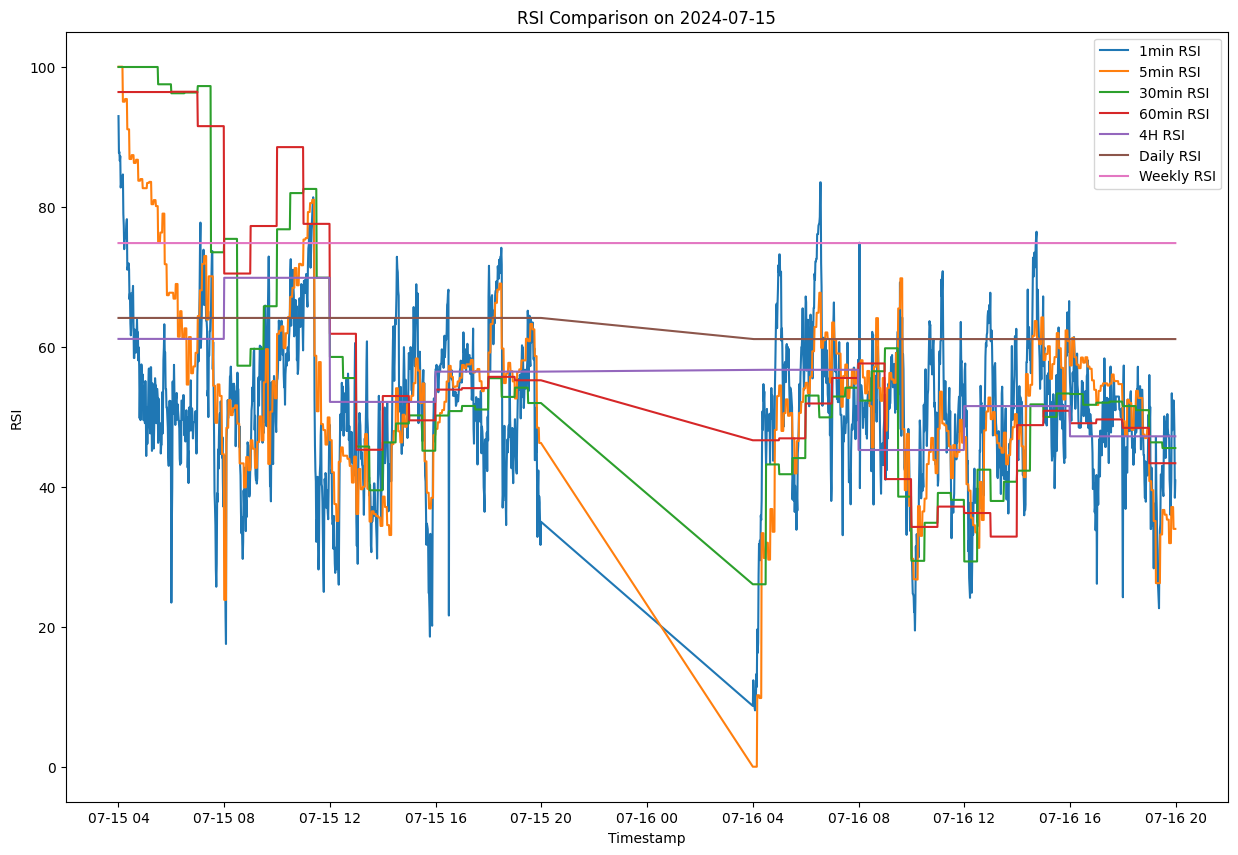

In [33]:
# 读取包含RSI的数据
data = pd.read_csv('data_with_rsi_comparison.csv', index_col='timestamp', parse_dates=True)

# 过滤2024年7月15日当天的数据
start_date = '2024-07-15'
end_date = '2024-07-16'
filtered_data = data[start_date:end_date]

# 绘制2024年7月15日当天的RSI
plt.figure(figsize=(15, 10))
plt.plot(filtered_data.index, filtered_data['rsi_1min'], label='1min RSI')
plt.plot(filtered_data.index, filtered_data['rsi_5min'], label='5min RSI')
plt.plot(filtered_data.index, filtered_data['rsi_30min'], label='30min RSI')
plt.plot(filtered_data.index, filtered_data['rsi_60min'], label='60min RSI')
plt.plot(filtered_data.index, filtered_data['rsi_4h'], label='4H RSI')
plt.plot(filtered_data.index, filtered_data['rsi_daily'], label='Daily RSI')
plt.plot(filtered_data.index, filtered_data['rsi_weekly'], label='Weekly RSI')
plt.title('RSI Comparison on 2024-07-15')
plt.xlabel('Timestamp')
plt.ylabel('RSI')
plt.legend()
plt.show()

In [26]:
import pandas as pd
import numpy as np

# 读取包含RSI的数据
data = pd.read_csv('data_with_rsi_comparison.csv', parse_dates=['timestamp'])

# 设置时间戳为索引ss
data.set_index('timestamp', inplace=True)

# 计算相对上个时间点的涨跌幅
data['price_change'] = data['close'].pct_change()

# 计算量的变化
#data['volume_change'] = data['volume'].pct_change()

# 使用移动平均和标准差识别异常值
def identify_outliers(df, column, window=20000, n_std=3):
    rolling_mean = df[column].rolling(window=window).mean()
    rolling_std = df[column].rolling(window=window).std()
    lower_bound = rolling_mean - (rolling_std * n_std)
    upper_bound = rolling_mean + (rolling_std * n_std)
    #mean_rolling_std = rolling_std.mean()
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)],rolling_std

# 识别价格变化和量变化的异常值
price_outliers,rolling_std = identify_outliers(data, 'price_change')
#volume_outliers = identify_outliers(data, 'volume_change')
max_rolling_std = rolling_std.dropna().max()
mean_rolling_std = rolling_std.mean()

print(mean_rolling_std,'\n',max_rolling_std)



0.0006571176675881605 
 0.0031223811766555396


In [36]:
# 使用移动平均和标准差识别异常值
def identify_outliers(df, column, window=20000, n_std=4):
    rolling_mean = df[column].rolling(window=window).mean()
    rolling_std = df[column].rolling(window=window).std()
    lower_bound = rolling_mean - (rolling_std * n_std)
    upper_bound = rolling_mean + (rolling_std * n_std)
    #mean_rolling_std = rolling_std.mean()
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)],rolling_std

In [94]:
close_price_outliers,closeprice_rolling_std=identify_outliers(data, 'close')


In [95]:
#close_price_outliers=close_price_outliers.dropna()
close_price_outliers

,timestamp,open,high,low,close,volume,rsi_1min,rsi_5min,rsi_30min,rsi_60min,rsi_4h,rsi_daily,rsi_weekly,price_change
109317,2019-08-05 18:01:00,173.300,173.397,172.909,172.971,30869,21.181885,19.025892,17.203481,11.160687,6.634745,18.025893,57.408687,-0.002347
109318,2019-08-05 18:02:00,172.971,173.018,172.589,172.651,43254,17.803278,19.025892,17.203481,11.160687,6.634745,18.025893,57.408687,-0.001850
109319,2019-08-05 18:03:00,172.660,172.853,172.540,172.602,10032,17.347001,19.025892,17.203481,11.160687,6.634745,18.025893,57.408687,-0.000284
109320,2019-08-05 18:04:00,172.524,172.591,172.143,172.205,38078,14.176807,19.025892,17.203481,11.160687,6.634745,18.025893,57.408687,-0.002300
109321,2019-08-05 18:05:00,172.127,172.174,171.183,171.768,26833,11.652433,17.742904,17.203481,11.160687,6.634745,18.025893,57.408687,-0.002538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109425,2019-08-05 19:55:00,170.914,171.049,170.863,171.021,4942,39.886494,26.417803,17.370948,10.534418,6.634745,18.025893,57.408687,0.000339
109426,2019-08-05 19:56:00,171.001,171.214,170.960,171.108,6061,43.918760,26.417803,17.370948,10.534418,6.634745,18.025893,57.408687,0.000509
109427,2019-08-05 19:57:00,171.079,171.165,171.028,171.089,4887,43.236660,26.417803,17.370948,10.534418,6.634745,18.025893,57.408687,-0.000111
109428,2019-08-05 19:58:00,171.089,171.155,170.979,171.118,1199,44.649677,26.417803,17.370948,10.534418,6.634745,18.025893,57.408687,0.000170


In [86]:
close_price_outliers['timestamp']

955035    2023-08-16 17:19:00
978588    2023-09-21 17:12:00
981460    2023-09-26 17:26:00
1032553   2023-12-12 17:06:00
1069654   2024-02-08 16:58:00
1094475   2024-03-18 16:55:00
1095440   2024-03-19 17:08:00
1097337   2024-03-21 17:00:00
1103052   2024-04-01 17:16:00
1168474   2024-07-10 17:08:00
Name: timestamp, dtype: datetime64[ns]

In [84]:


close_price_outliers['date'] = pd.to_datetime(close_price_outliers['date'])
close_price_outliers = close_price_outliers[close_price_outliers['date'] != pd.Timestamp('2019-08-05')]
close_price_outliers

C:\Users\zhaoz\AppData\Local\Temp\ipykernel_7876\2665023335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price_outliers['date'] = pd.to_datetime(close_price_outliers['date'])


,index,timestamp,open,high,low,close,volume,rsi_1min,rsi_5min,rsi_30min,rsi_60min,rsi_4h,rsi_daily,rsi_weekly,price_change,date
955035,955035,2023-08-16 17:19:00,361.091,361.105,345.946,345.953,52,0.740910,3.979963,30.252845,26.670749,26.387278,34.366354,62.362895,-0.041952,2023-08-16
978588,978588,2023-09-21 17:12:00,356.541,356.556,345.709,345.714,3822,1.366192,32.780726,22.929870,17.091710,14.958678,30.964545,60.553253,-0.030405,2023-09-21
981460,981460,2023-09-26 17:26:00,353.668,353.713,332.010,332.015,463,0.338503,55.483358,35.922542,30.812301,29.760256,30.203607,53.803015,-0.061261,2023-09-26
1032553,1032553,2023-12-12 17:06:00,398.201,414.717,398.195,414.716,612,99.258037,70.661537,76.177453,77.634545,85.877891,71.357782,65.573067,0.041490,2023-12-12
1069654,1069654,2024-02-08 16:58:00,432.780,454.241,432.725,454.241,63859,99.506039,48.074250,52.697661,59.927221,67.178767,69.334674,72.603619,0.049589,2024-02-08
1094475,1094475,2024-03-18 16:55:00,436.695,436.707,414.169,414.170,4505,1.890531,38.850027,48.400156,57.798075,53.638905,49.946050,65.756298,-0.051674,2024-03-18
1095440,1095440,2024-03-19 17:08:00,437.873,437.875,415.945,415.945,19102,0.771432,51.700890,62.744762,64.461569,60.882210,52.929199,65.756298,-0.049957,2024-03-19
1097337,1097337,2024-03-21 17:00:00,445.560,445.583,421.163,421.163,96493,0.784835,46.083256,44.873448,53.917734,68.099417,62.736145,65.756298,-0.054786,2024-03-21
1103052,1103052,2024-04-01 17:16:00,444.263,444.285,414.170,414.170,2022,0.362823,58.820466,52.215112,51.941893,50.845037,58.199682,68.582573,-0.067722,2024-04-01
1168474,1168474,2024-07-10 17:08:00,502.970,502.980,373.130,373.130,441,0.148131,56.715281,74.956970,82.070796,84.965344,80.560345,75.310038,-0.258161,2024-07-10


In [44]:
close_price_outliers.reset_index(inplace=True)

In [ ]:
close_price_outliers['timestamp'] = pd.to_datetime(close_price_outliers['timestamp'])
close_price_outliers['date'] = close_price_outliers['timestamp'].dt.date

In [47]:
unique_dates = close_price_outliers['date'].unique()

# 打印唯一日期值
print(unique_dates)

[datetime.date(2019, 8, 5) datetime.date(2023, 8, 16)
 datetime.date(2023, 9, 21) datetime.date(2023, 9, 26)
 datetime.date(2023, 12, 12) datetime.date(2024, 2, 8)
 datetime.date(2024, 3, 18) datetime.date(2024, 3, 19)
 datetime.date(2024, 3, 21) datetime.date(2024, 4, 1)
 datetime.date(2024, 7, 10)]


In [55]:
data.reset_index(inplace=True)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date'] = data['timestamp'].dt.date

In [56]:
data['date']

0          2019-01-02
1          2019-01-02
2          2019-01-02
3          2019-01-02
4          2019-01-02
              ...    
1172459    2024-07-16
1172460    2024-07-16
1172461    2024-07-16
1172462    2024-07-16
1172463    2024-07-16
Name: date, Length: 1172464, dtype: object

In [58]:
dates_to_include = [pd.to_datetime(date).date() for date in ['2019-08-05', '2023-08-16', '2023-09-21',
                                                            '2023-09-26', '2023-12-12', '2024-02-08',
                                                            '2024-03-18', '2024-03-19', '2024-03-21',
                                                            '2024-04-01', '2024-07-10']]

# 筛选符合日期列表的行
filtered_data = data[data['date'].isin(dates_to_include)]
filtered_data.to_csv('outlier_date_data.csv', index=False)

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


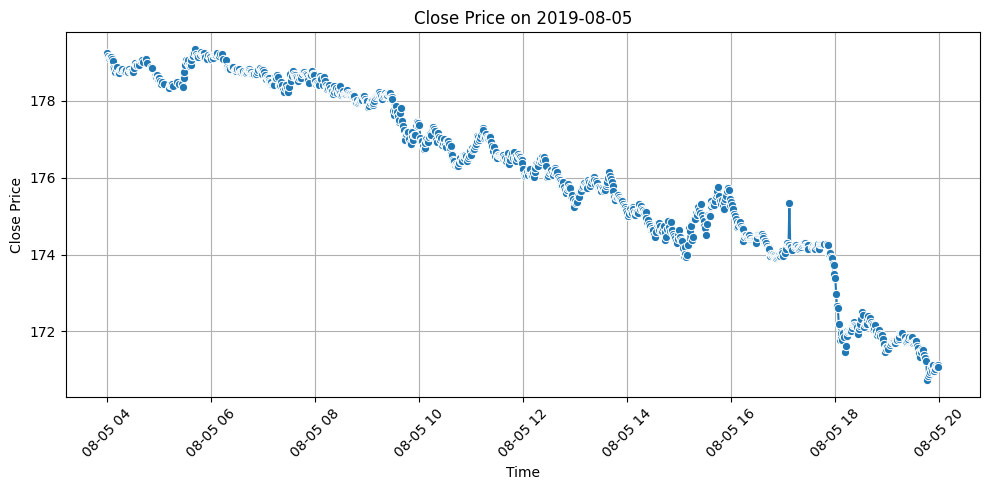

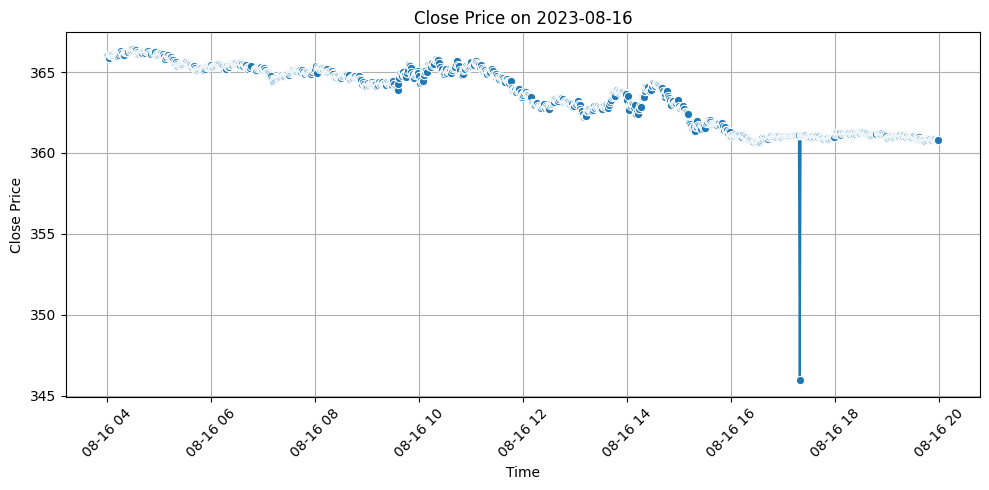

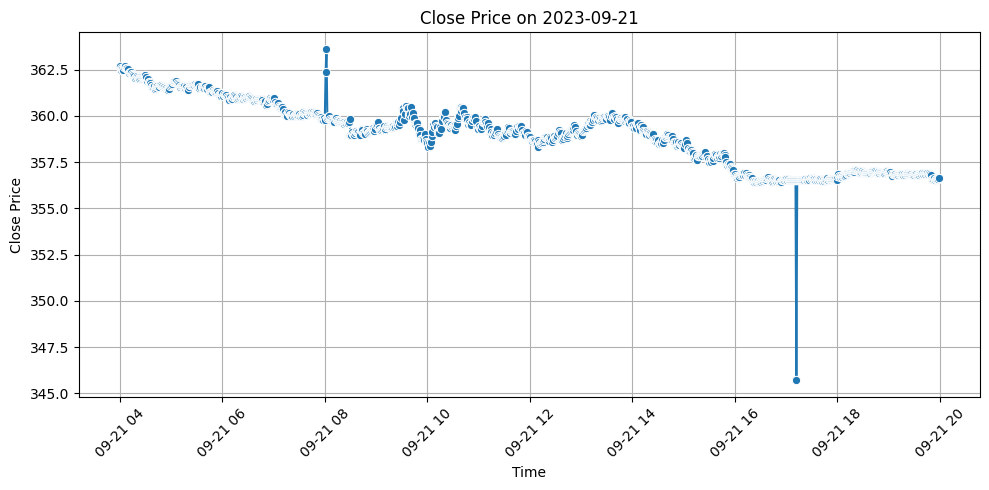

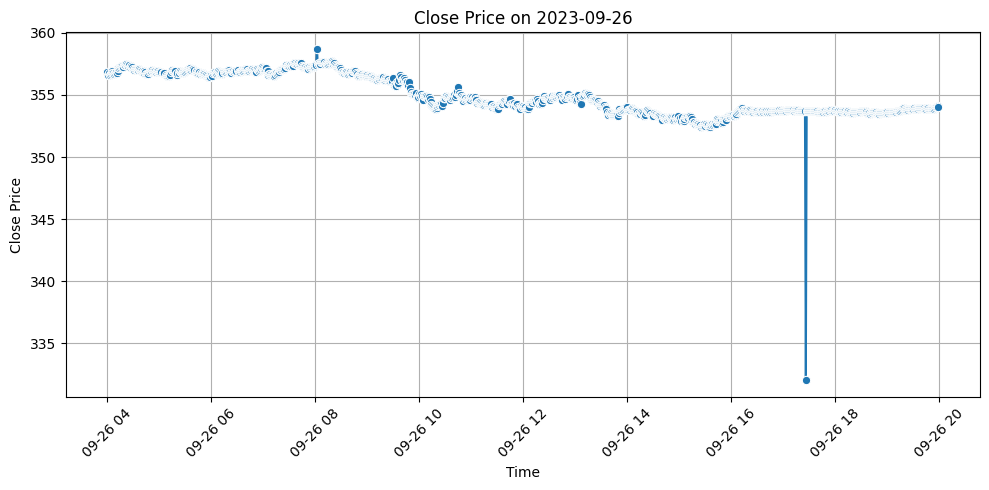

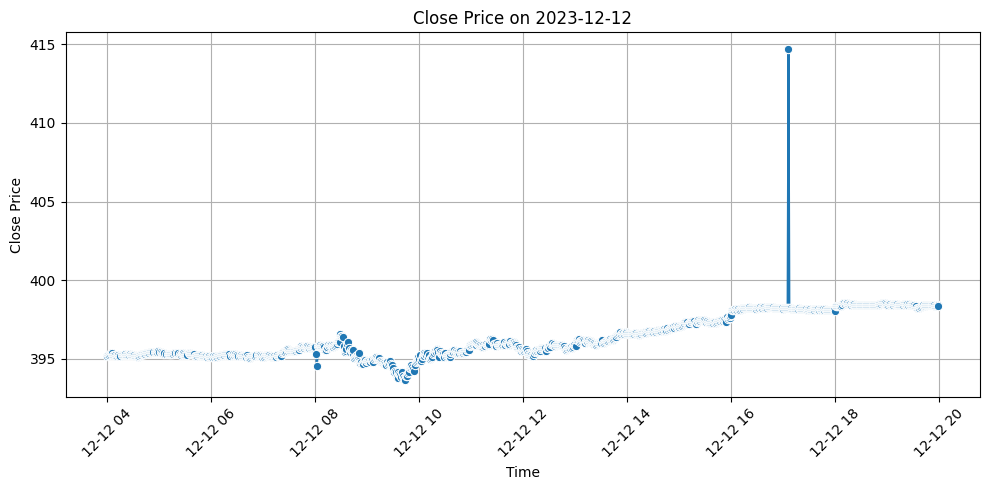

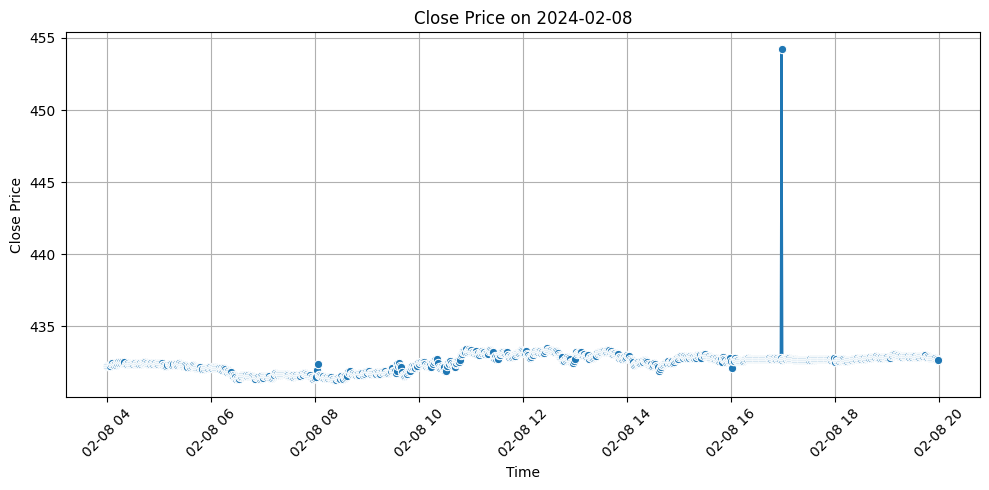

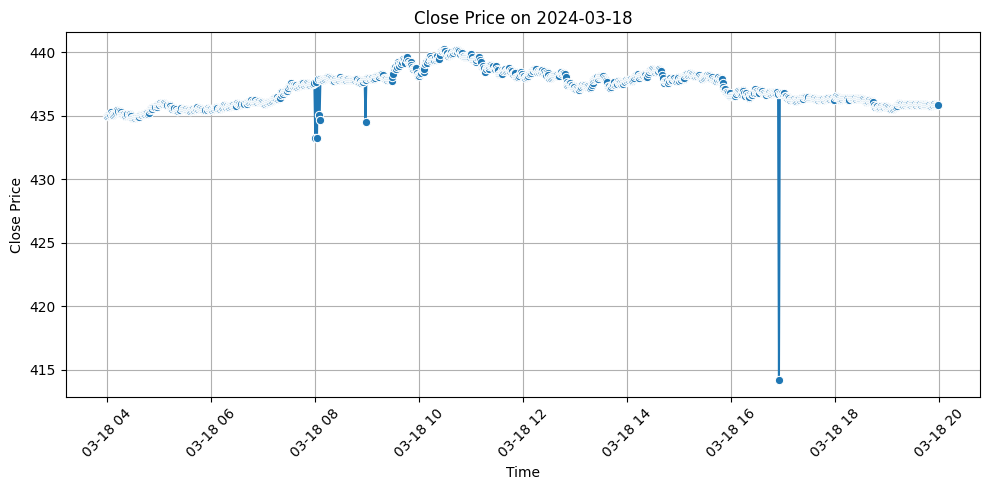

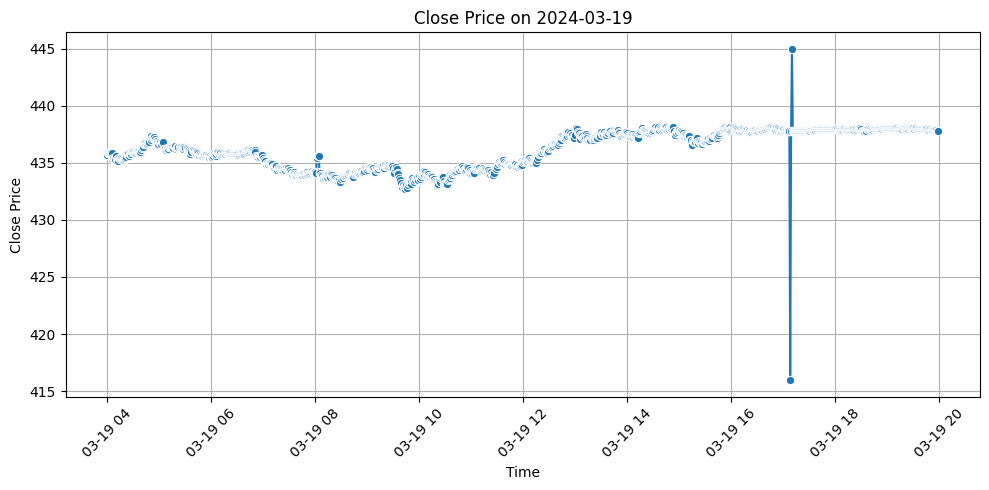

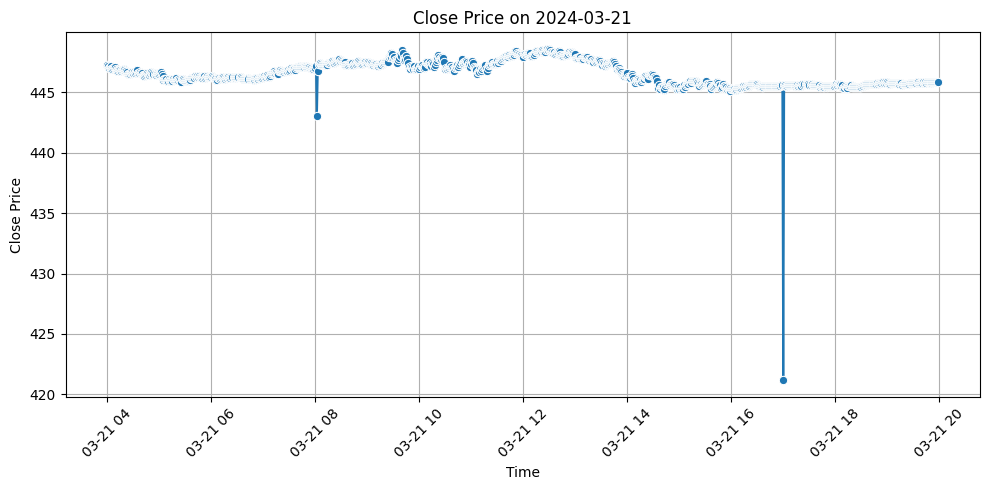

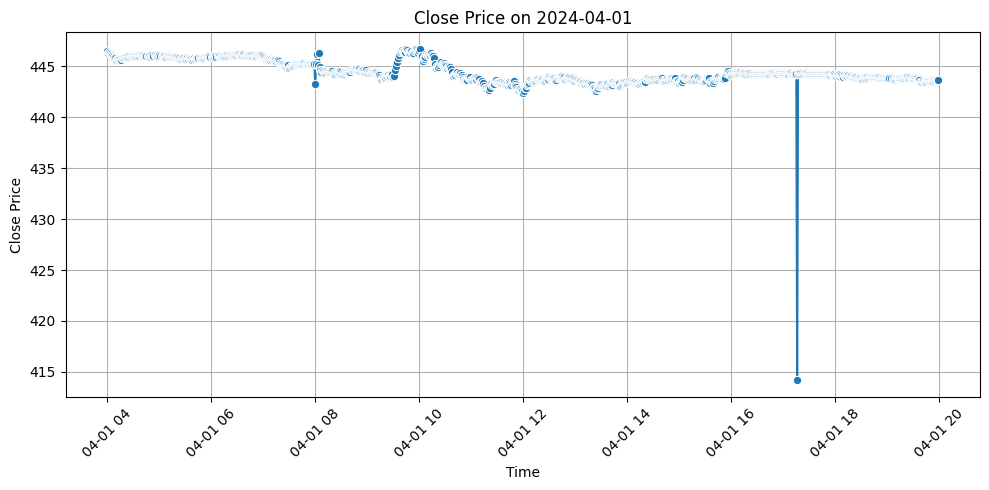

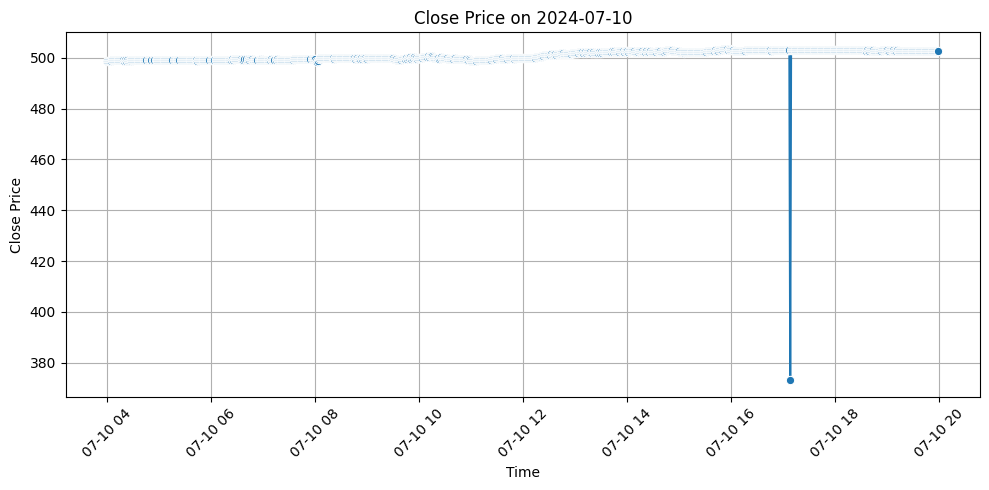

In [63]:
for date in dates_to_include:
    daily_data = filtered_data[filtered_data['date'] == date]
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=daily_data, x='timestamp', y='close', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title(f'Close Price on {date}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [25]:
closeprice_rolling_std=closeprice_rolling_std.dropna()
closeprice_rolling_std

timestamp
2019-02-07 13:52:00    4.897664
2019-02-07 13:53:00    4.897132
2019-02-07 13:54:00    4.896608
2019-02-07 13:55:00    4.896089
2019-02-07 13:56:00    4.895577
                         ...   
2024-07-16 19:55:00    8.404995
2024-07-16 19:56:00    8.404853
2024-07-16 19:57:00    8.404711
2024-07-16 19:58:00    8.404568
2024-07-16 19:59:00    8.404428
Name: close, Length: 1152465, dtype: float64

In [12]:
a=data['price_change'][data['price_change']>0.02]
a.describe()


count    52.000000
mean      0.052477
std       0.054373
min       0.020213
25%       0.026365
50%       0.042618
75%       0.053858
max       0.347962
Name: price_change, dtype: float64

In [13]:
a

timestamp
2019-08-06 04:00:00    0.025291
2020-03-03 10:00:00    0.021946
2020-03-13 04:00:00    0.063114
2020-03-16 08:04:00    0.053624
2020-03-17 04:00:00    0.027005
2020-03-20 04:00:00    0.048706
2020-03-24 04:00:00    0.031023
2020-03-25 08:04:00    0.031708
2020-04-06 04:00:00    0.043965
2020-11-04 04:00:00    0.026056
2021-03-08 16:18:00    0.024983
2022-01-25 08:00:00    0.020535
2022-02-03 08:02:00    0.021511
2022-10-18 08:01:00    0.020213
2022-11-10 08:30:00    0.026467
2022-12-13 08:30:00    0.023936
2023-05-23 17:05:00    0.070778
2023-05-24 17:00:00    0.022085
2023-06-12 17:28:00    0.029117
2023-06-29 16:56:00    0.050343
2023-07-24 17:22:00    0.073508
2023-08-16 17:20:00    0.043746
2023-09-21 17:13:00    0.031243
2023-09-26 17:27:00    0.065349
2023-09-27 17:17:00    0.024254
2023-10-02 17:40:00    0.030115
2023-10-05 17:29:00    0.033895
2023-11-03 17:12:00    0.035046
2023-11-20 17:14:00    0.150371
2023-11-20 17:31:00    0.237745
2023-11-24 14:21:00    0.05063

In [ ]:
# 删除异常值
#data_cleaned = data.drop(price_outliers.index)
#data_cleaned = data_cleaned.drop(volume_outliers.index)

# 保存清理后的数据
data.to_csv('data_include_pct_change.csv', index=True)
print("Data cleaned and saved to data_cleaned.csv")


In [3]:
import pandas as pd

data=pd.read_csv('cleaned_data_include_pct_change.csv')

In [91]:

data['timestamp'] = pd.to_datetime(data['timestamp'])
# 遍历每个要填补的 timestamp
for ts in close_price_outliers['timestamp']:
    # 找到当前 timestamp 的前一个数据
    previous_row = data[data['timestamp'] < ts].iloc[-1]
    
    # 用前一个数据替换当前 timestamp 对应行的数据
    data.loc[data['timestamp'] == ts, data.columns != 'timestamp'] = previous_row[data.columns != 'timestamp'].values




In [96]:
data.to_csv('data_include_pct_change.csv', index=True)

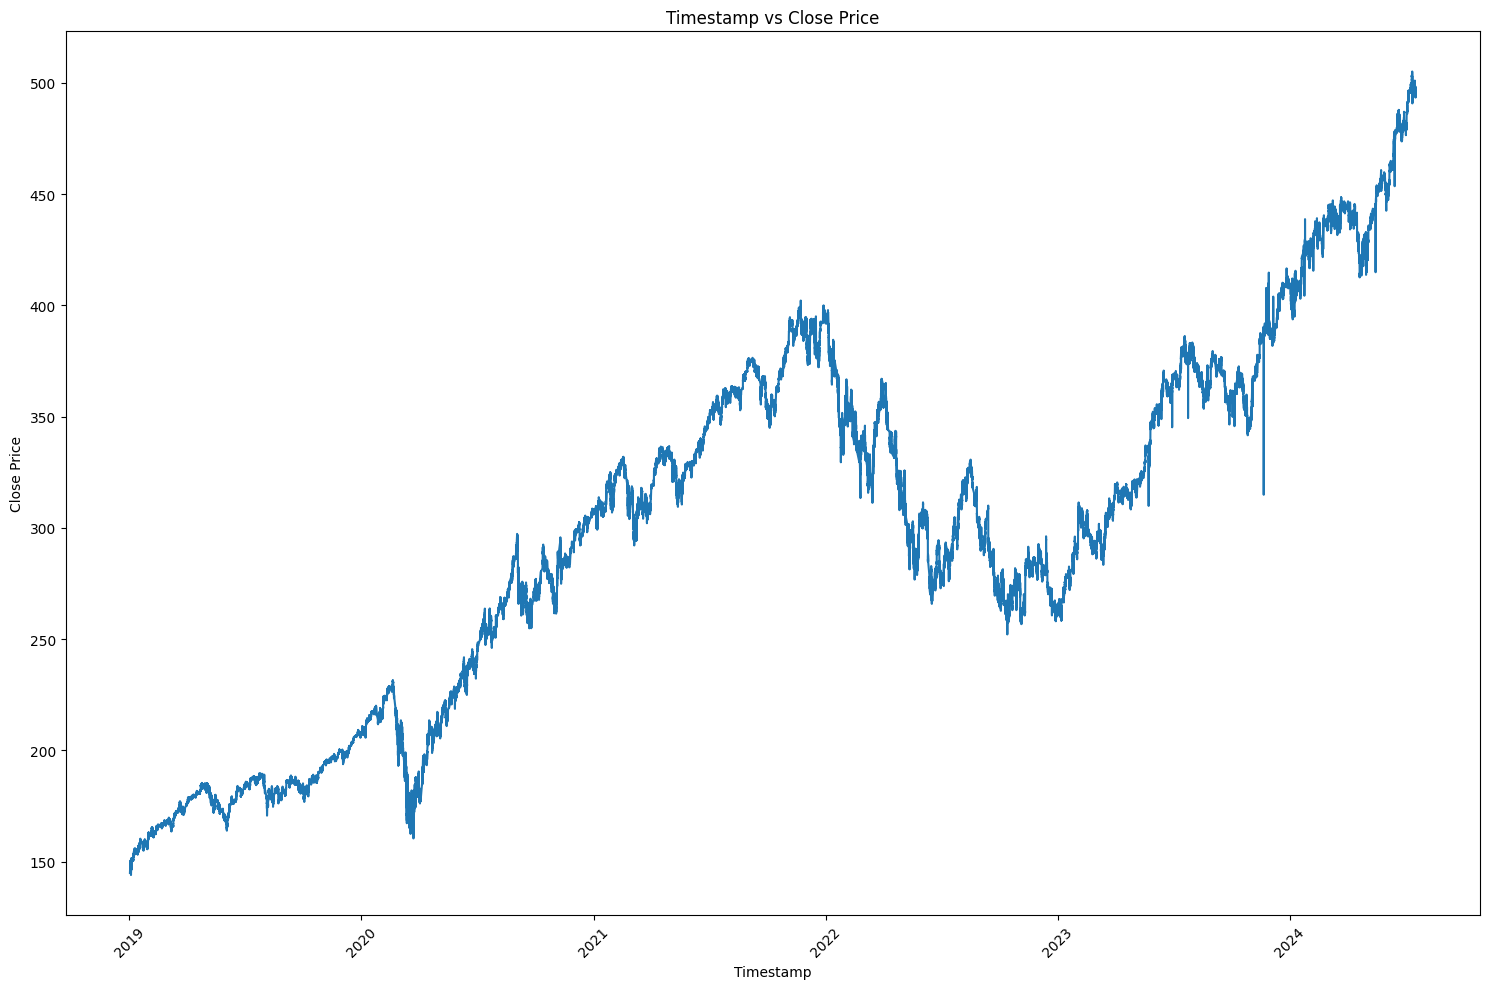

In [93]:
# 绘制时间序列图
plt.figure(figsize=(15, 10))
sns.lineplot(x='timestamp', y='close', data=data)
plt.title('Timestamp vs Close Price')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# 假设你的数据框名为 df
has_nan = data[['timestamp','open','high','low','close','volume']].isna().any()

if has_nan.any():
    print("There are NaN values in the following columns:")
    print(has_nan[has_nan])
else:
    print("There are no NaN values in the specified columns.")

There are no NaN values in the specified columns.
